# Predicting Diabetes with MLPs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from utils import preprocess

### Loading in the data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

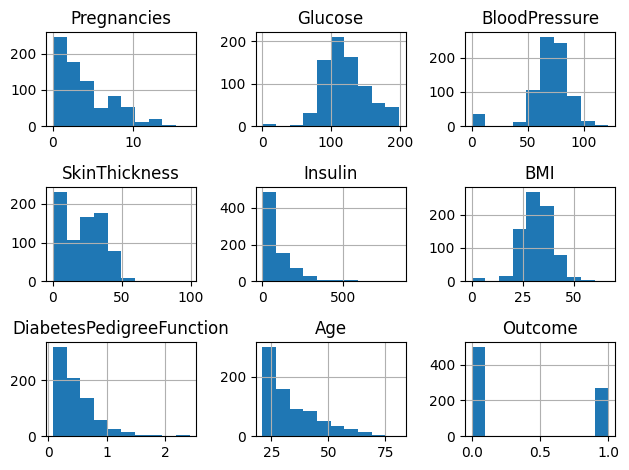

In [3]:
df.hist()
plt.tight_layout()

C:\Users\korisnik\AppData\Local\Temp\ipykernel_69308\3205049449.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
C:\Users\korisnik\AppData\Local\Temp\ipykernel_69308\3205049449.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
ht

C:\Users\korisnik\AppData\Local\Temp\ipykernel_69308\3205049449.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
C:\Users\korisnik\Radna površina\Predicting Diabetes with Multilayer Perceptrons\env\lib\site-packages\seaborn\distributions.py:2517: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\korisnik\AppData\Local\Temp\ipykernel_69308\3205049449.py:7: UserWarning: 

`dist

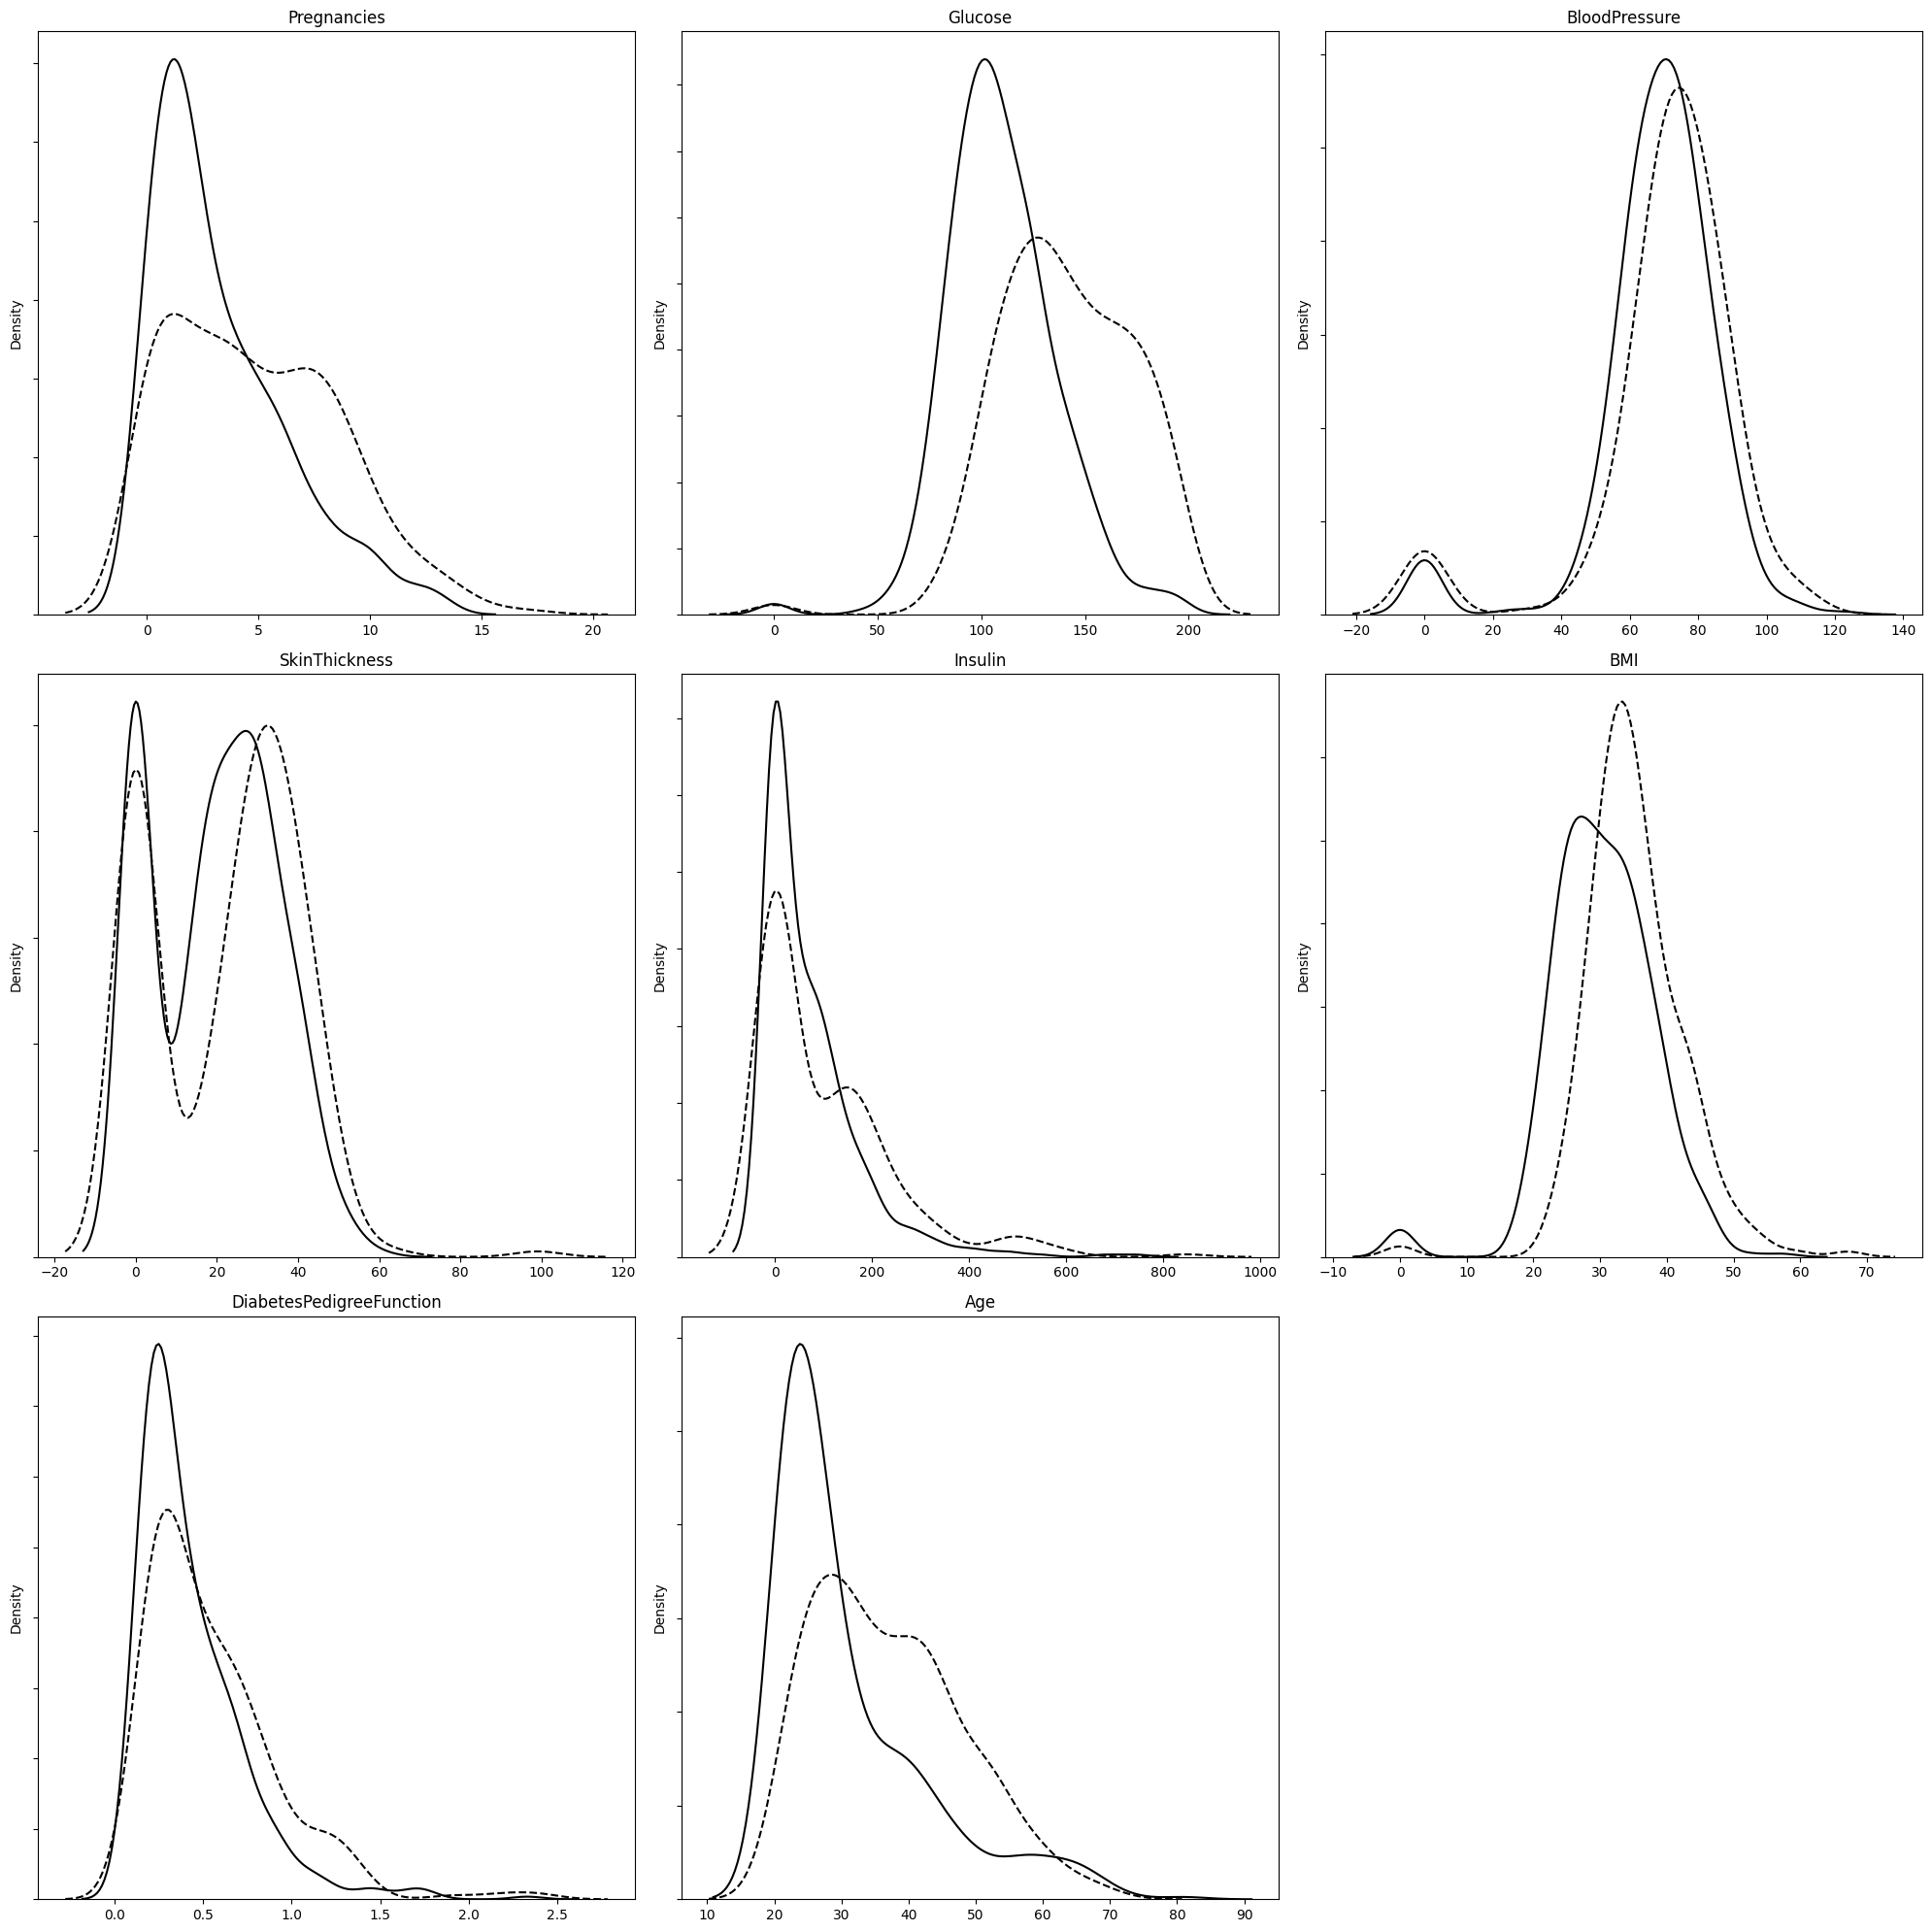

In [4]:
plt.subplots(3,3,figsize=(20,20))

for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
    
plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()

In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The dataset doesn't contain any missing values, but with the describe method we're able to notice some irregularities such as min value for certain features(Glucose, BloodPressure etc.) is 0 which doesn't make any sense. 

In [7]:
df = preprocess(df)

----------------------------------------------
Before preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------
----------------------------------------------
After preprocessing
Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
----------------------------------------------


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,7.956598e-16,-3.330669e-16,3.515706e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.665945e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-4.007289e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,-3.345079e-16,-8.363615e-03,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,-3.345079e-16,6.029301e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.126238e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.000000


### Splitting the data

In [9]:
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [11]:
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size = 0.2)

### Model building

In [12]:
model = Sequential([
    Dense(units = 64 , activation = 'relu' , input_dim = X_train.shape[1]) , 
    Dense(units = 32 , activation = 'relu') , 
    Dense(units = 1 , activation = 'sigmoid')
])

In [13]:
model.compile(optimizer = Adam() ,
     loss = tf.keras.losses.BinaryCrossentropy() ,
     metrics = ['accuracy'])

In [14]:
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6457 - accuracy: 0.6517
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5404 - accuracy: 0.7352
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7780
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7882
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4397 - accuracy: 0.7862
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.7882
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4233 - accuracy: 0.7923
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.7984
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.7943
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.7984
Epoch 11/

16/16 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9063
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9022
Epoch 85/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9084
Epoch 86/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 0.9063
Epoch 87/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9104
Epoch 88/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9124
Epoch 89/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9043
Epoch 90/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9084
Epoch 91/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9145
Epoch 92/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9104
Epoch 93/100


### Evaluating the model

In [15]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

16/16 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9328
Training Accuracy: 93.28%

5/5 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.7727
Testing Accuracy: 77.27%



5/5 [==============================] - 0s 3ms/step


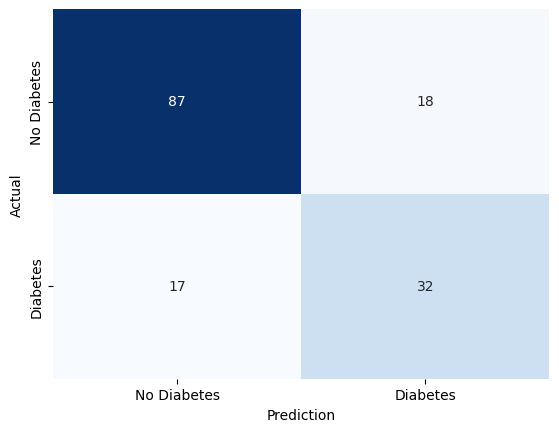

<Figure size 640x480 with 0 Axes>

In [16]:
# Results - Confusion Matrix
from sklearn.metrics import confusion_matrix

y_test_pred = [0 if x < 0.5 else 1 for x in model.predict(X_test)]
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

In [17]:
y_test_pred_probs = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [18]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

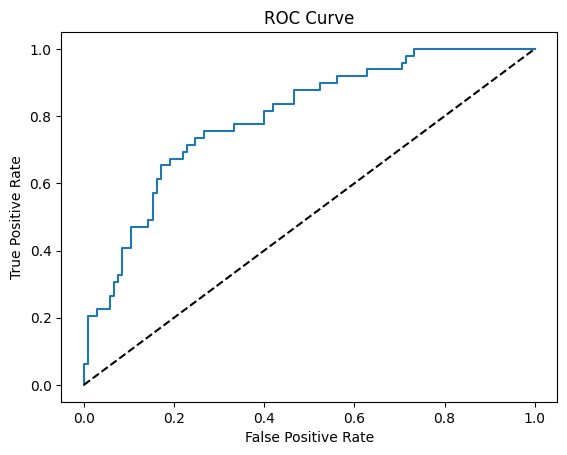

In [19]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')